In [2]:
%tensorflow_version 2.x

In [3]:
import tensorflow as tf
print(tf.__version__)

2.7.0


• PROJECT OBJECTIVE: To build a regressor which can use the given parameters to determine the signal strength or quality.
1. Data import and Understanding [10 Marks]


A. Read the ‘Signals.csv’ as DatFrame and import required libraries. [2 Marks]

In [4]:
from google.colab import drive 
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [119]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedKFold


In [6]:
data = pd.read_csv('/content/gdrive/MyDrive/GL/NNIntro/NNProject1/Signal.csv')

In [7]:
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


B. Check for missing values and print percentage for each attribute. [2 Marks]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
data.shape

(1599, 12)

In [10]:
data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [12]:
round(data.isnull().mean()*100, 2)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]\

In [13]:
duplicate = data[data.duplicated()]


In [14]:
data[data.duplicated()].count()

Parameter 1        240
Parameter 2        240
Parameter 3        240
Parameter 4        240
Parameter 5        240
Parameter 6        240
Parameter 7        240
Parameter 8        240
Parameter 9        240
Parameter 10       240
Parameter 11       240
Signal_Strength    240
dtype: int64

In [15]:
data = data.drop_duplicates()

In [16]:
data[data.duplicated()].count()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [17]:
data.shape

(1359, 12)

D. Visualise distribution of the target variable. [2 Marks]

In [18]:
data['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


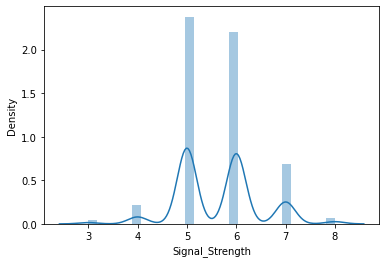

In [19]:
sns.distplot(data['Signal_Strength'])

E. Share insights from the initial data analysis (at least 2). [2 Marks]

In [ ]:
# 1.  From the signal_strength graph it seems like its a normal distribution
# 2.  Its a smaller dataset with 240 duplicate datarows.  
# 3.  we couldnt do the imputation for the duplicates, since it has more nearby closer values, again it creates more duplicate values 
# 4.  Its a non-null dataset
# 5.  The data shows almost a gaussian distribution 

2. Data preprocessing [7 Marks]

Split the data into X & Y. [1 Marks]

In [20]:
y = data['Signal_Strength']

X = data.drop(['Signal_Strength'], axis =1)


In [22]:
# To check 
print(X.shape)
print(y.shape)

(1359, 11)
(1359,)


Split the data into train & test with 70:30 proportion.[1 Marks]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)


Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]

In [82]:
print("Training data", X_train.shape)
print("Testing data", X_test.shape)
print("Target data", y_train.shape)
print("Target test data", y_test.shape)

Training data (951, 11)
Testing data (408, 11)
Target data (951,)
Target test data (408,)


Normalise the train and test data with appropriate method. [2 Marks]


In [83]:
transformer = Normalizer()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [84]:
X_train[0]

array([0.27544479, 0.0080666 , 0.01239502, 0.07476359, 0.00175104,
       0.11804777, 0.92470752, 0.01970217, 0.05922063, 0.01593645,
       0.21248598])

In [85]:
y_train[0]

5

Transform Labels into format acceptable by Neural Network [2 Marks]

In [86]:
#y_train = tf.keras.utils.to_categorical(y_train-2, num_classes=5)
#y_test = tf.keras.utils.to_categorical(y_test-2, num_classes=5) 

y_train = pd.get_dummies(y_train).astype('float32').values 
y_test = pd.get_dummies(y_test).astype('float32').values 

to_categorical creates 9 dummy classes, because it starts with 0, and our target data starts with 3, so changed to get_dummies.

In [87]:
y_train[0]



array([0., 0., 0., 1., 0., 0.], dtype=float32)

In [88]:
y_test[0]

array([0., 0., 1., 0., 0., 0.], dtype=float32)

3. Model Training & Evaluation using Neural Network [13 Marks]

A. Design a Neural Network to train a classifier. [3 Marks]

In [133]:
model = tf.keras.models.Sequential()

In [134]:
model.add(tf.keras.layers.BatchNormalization())

In [135]:
model.add(tf.keras.layers.Dense(12, input_shape=(11,), activation= 'relu'))

In [136]:
model.add(tf.keras.layers.Dense(8, activation='relu'))


In [137]:
model.add(tf.keras.layers.Dense(6, activation='softmax'))

In [138]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


B. Train the classifier using previously designed Architecture [2 Marks]

In [148]:
model_fit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 59.80%
56.46% (+/- 2.53%)


This gives a 60% accuracy rate.    

C. Plot 2 separate visuals. [3 Marks]

In [163]:
history_dict = model_fit.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

i. Training Loss and Validation Loss

In [164]:
acc = history_dict['accuracy']
val_acc= history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']


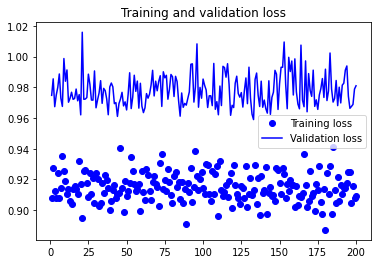

In [165]:

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

ii. Training Accuracy and Validation Accuracy

<Figure size 432x288 with 0 Axes>

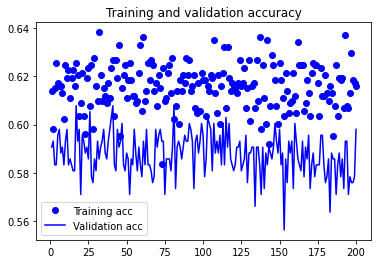

<Figure size 432x288 with 0 Axes>

In [166]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

The validation accuracy is better than the training accuracy.  
The validation loss is less than the training loss.
Maybe its because of lesser data available.  
We can try with remodeling using cross validation.

D. Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]

In [162]:
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=32)
cvscores = []
for train, test in kfold.split(X, y):
  # create model
	model2 = tf.keras.models.Sequential()

	model2.add(tf.keras.layers.BatchNormalization())
	model2.add(tf.keras.layers.Dense(12, input_shape=(11,), activation= 'relu'))	
	model2.add(tf.keras.layers.Dense(9, activation='relu'))
	model2.add(tf.keras.layers.Dense(6, activation='softmax'))
	# Compile model
	model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model2_fit = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose = 0)
	# evaluate the model
	scores = model2.evaluate(X_test, y_test, verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 59.56%
accuracy: 59.56%
accuracy: 59.80%
accuracy: 61.03%
accuracy: 60.54%
accuracy: 58.82%
59.89% (+/- 0.72%)


E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

In [127]:
history2_dict = model2_fit.history
history2_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [128]:
acc2 = history2_dict['accuracy']
val_acc2= history2_dict['val_accuracy']
loss2 = history2_dict['loss']
val_loss2 = history2_dict['val_loss']

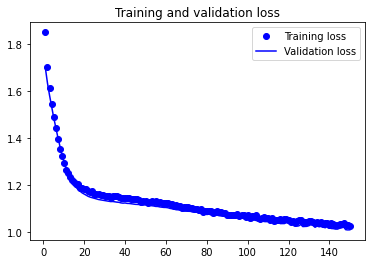

In [130]:
epochs = range(1, len(acc2) + 1)

plt.plot(epochs, loss2, 'bo', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 432x288 with 0 Axes>

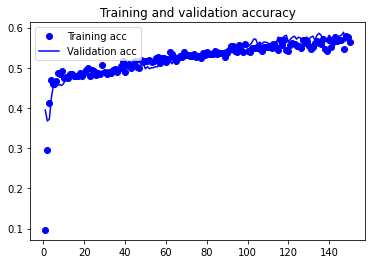

<Figure size 432x288 with 0 Axes>

In [131]:
plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

1.  The model is not giving any more than 60% accuracy, but here, the accuracy and loss values for both training and testing values are looking food.  
2.  The model has very less dataset
3.  Even though I did the K-fold cross validation, its still giving 50% accuracy
4.  Its increasing a little bit, maybe it needs more training.
5. The training accuracy and loss, and testing accuracy and loss are almost the same.
